In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

Load data before making cuts for plots

In [2]:
# signal data
org_sig_df = pd.read_csv('Dijet_bb_pt20_50_dw.csv')

# background data
org_bkg_df = pd.read_csv('Dijet_qq_pt20_50_dw.csv')

Make cuts to data

In [3]:
# signal data
sig_df = org_sig_df

# background data
bkg_df = org_bkg_df

In [4]:
# Make cuts to data

sig_df = sig_df[sig_df['Jet0_MC_Match'] == 1]
bkg_df = bkg_df[bkg_df['Jet0_MC_Match'] == 1]

sig_df = sig_df[sig_df['Jet0_MC_Jet_EfB'] > 0.6]
bkg_df = bkg_df[bkg_df['Jet0_MC_Jet_EfB'] < 0.6]

bkg_df = bkg_df[bkg_df['Jet0_MC_Jet_EfD'] < 0.6]

Make plots of data before and after cuts

In [5]:
def plot_before_after_cuts(col, bins):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # Make bins the same
    all_data = np.concatenate([org_sig_df[col], org_bkg_df[col], sig_df[col], bkg_df[col]])
    data_min, data_max = np.min(all_data), np.max(all_data)

    bin_edges = np.linspace(data_min, data_max, bins + 1)

    # Before cuts
    ax1.hist(org_sig_df[col], label="Signal", bins=bin_edges, range=(data_min, data_max), histtype='step', color='darkred')
    ax1.hist(org_bkg_df[col], label="Background", bins=bin_edges, range=(data_min, data_max), histtype='step', color='mediumblue')
    ax1.legend(loc='best')
    ax1.set_yscale('log')
    ax1.set_xlabel(f'{col}')
    ax1.set_ylabel('Counts')
    ax1.set_title(f'{col} Before Cuts');

    # After cuts
    ax2.hist(sig_df[col], label="Signal", bins=bin_edges, range=(data_min, data_max), histtype='step', color='darkred')
    ax2.hist(bkg_df[col], label="Background", bins=bin_edges, range=(data_min, data_max), histtype='step', color='mediumblue')
    ax2.legend(loc='best')
    ax2.set_yscale('log')
    ax2.set_xlabel(f'{col}')
    ax2.set_ylabel('Counts')
    ax2.set_title(f'{col} After Cuts');

    plt.tight_layout()
    plt.show()

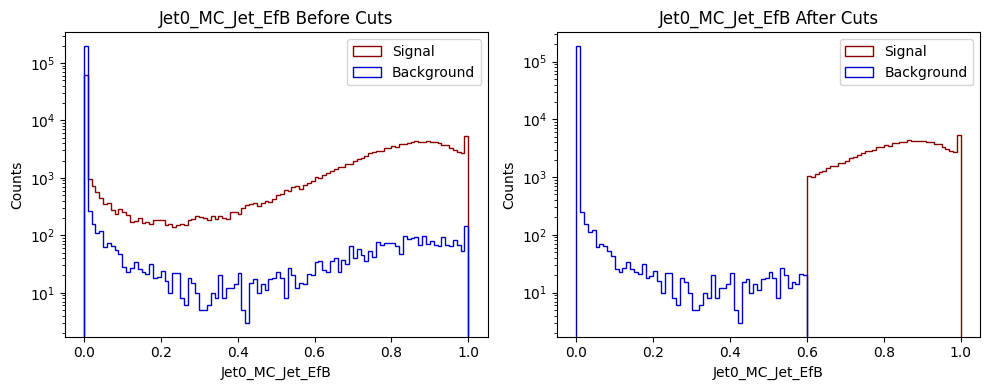

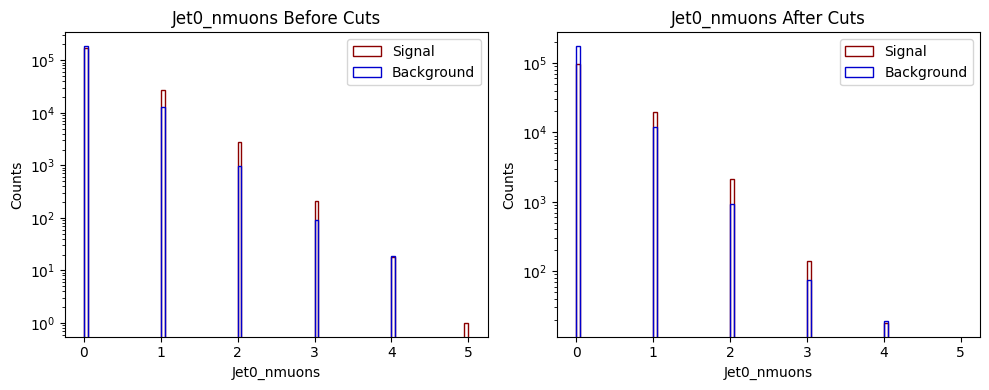

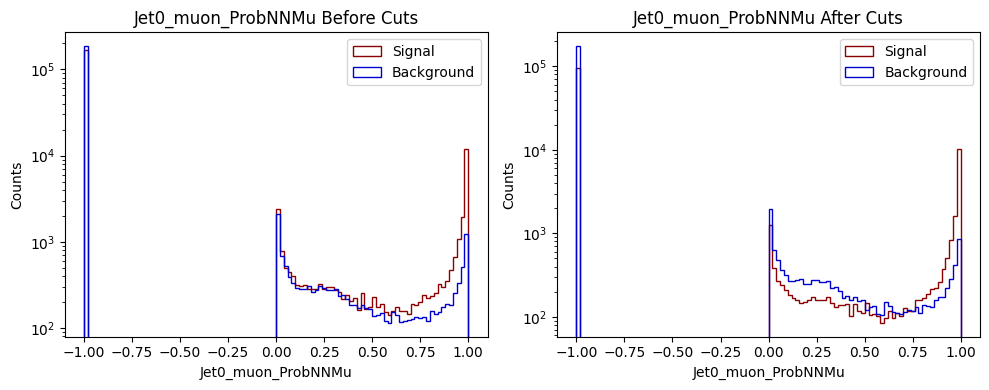

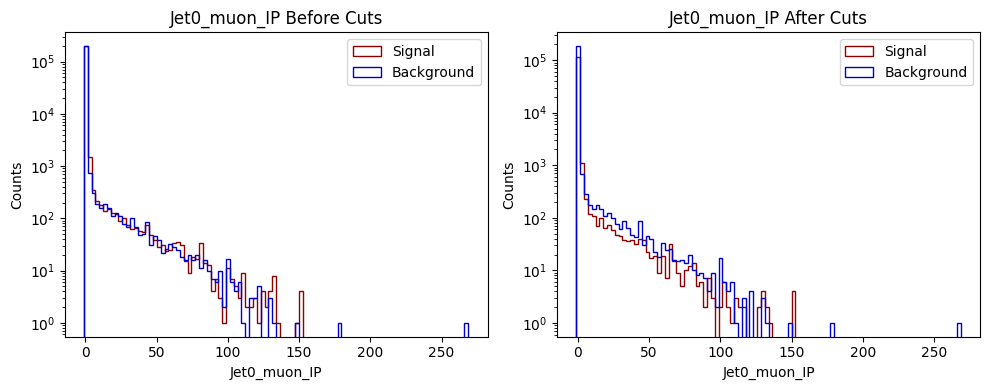

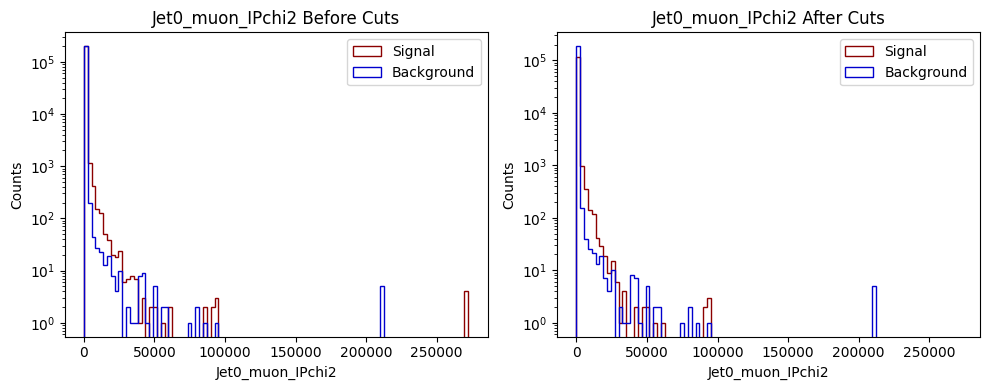

In [6]:
bins = 100
plot_before_after_cuts('Jet0_MC_Jet_EfB', bins)
plot_before_after_cuts('Jet0_nmuons', bins)
plot_before_after_cuts('Jet0_muon_ProbNNMu', bins)
plot_before_after_cuts('Jet0_muon_IP', bins)
plot_before_after_cuts('Jet0_muon_IPchi2', bins)

Plot features data

In [7]:
# Distinguish signal and background
org_sig_df['IsB'] = 1
org_bkg_df['IsB'] = 0

# Separate Jet 0 and Jet 1 data
org_sig_jet0 = org_sig_df[org_sig_df.columns[org_sig_df.columns.str.contains("Jet0|IsB")]]
org_bkg_jet0 = org_bkg_df[org_bkg_df.columns[org_bkg_df.columns.str.contains("Jet0|IsB")]]

org_sig_jet1 = org_sig_df[org_sig_df.columns[org_sig_df.columns.str.contains("Jet1|IsB")]]
org_bkg_jet1 = org_bkg_df[org_bkg_df.columns[org_bkg_df.columns.str.contains("Jet1|IsB")]]

# Combine signal and background and shuffle
org_train_df = pd.concat([org_sig_jet0.head(1000), org_bkg_jet0.iloc[100000:101000]]).sample(frac=1, random_state=42).reset_index(drop=True)
org_test_df = pd.concat([org_sig_jet1.head(1000), org_bkg_jet1.iloc[100000:101000]]).sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
# Distinguish signal and background
sig_df['IsB'] = 1
bkg_df['IsB'] = 0

# Separate Jet 0 and Jet 1 data
sig_jet0 = sig_df[sig_df.columns[sig_df.columns.str.contains("Jet0|IsB")]]
bkg_jet0 = bkg_df[bkg_df.columns[bkg_df.columns.str.contains("Jet0|IsB")]]

sig_jet1 = sig_df[sig_df.columns[sig_df.columns.str.contains("Jet1|IsB")]]
bkg_jet1 = bkg_df[bkg_df.columns[bkg_df.columns.str.contains("Jet1|IsB")]]

# Combine signal and background and shuffle
train_df = pd.concat([sig_jet0.head(1000), bkg_jet0.iloc[100000:101000]]).sample(frac=1, random_state=42).reset_index(drop=True)
test_df = pd.concat([sig_jet1.head(1000), bkg_jet1.iloc[100000:101000]]).sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
# Track/ daughter kinematic features
train_d_cols = [col for col in train_df.columns if "_Daughters" in col]
test_d_cols = [col for col in test_df.columns if "_Daughters" in col]

# Jet input features
train_jet_cols = ['Jet0_Eta', 'Jet0_PT']
test_jet_cols = ['Jet1_Eta', 'Jet1_PT']

# Features columns (daughter kinematics + Eta and pT)
train_f_cols = train_d_cols + train_jet_cols
test_f_cols = test_d_cols + test_jet_cols

Old plots

In [47]:
# customized plot function 
def custom_plot(col, bins, range):
    plt.hist(sig_df, label="Signal", bins=bins, range=range, histtype='step')
    plt.hist(bkg_df, label="Background", bins=bins, range=range, histtype='step')
    plt.legend(loc='best')
    plt.title(f'{col}');

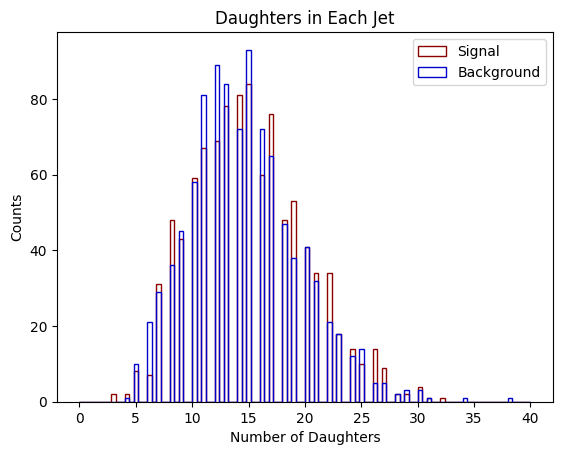

In [52]:
plt.hist(df.Jet0_nDaughters, label="Signal", range=[0,40], bins=100, histtype='step', color='darkred')
plt.hist(df2.Jet0_nDaughters, label="Background", range=[0,40], bins=100, histtype='step', color='mediumblue')
plt.xlabel('Number of Daughters')
plt.ylabel("Counts")
plt.legend(loc='best')
plt.title('Daughters in Each Jet'); 

In [ ]:
sig_list = []
back_list = []

for i, row in df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_ID'].strip('[]').split(',')]
    sig_list.extend(numbers)

for i, row in df2.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_ID'].strip('[]').split(',')]
    back_list.extend(numbers)

In [ ]:
sig_counts = Counter(sig_list)
back_counts = Counter(back_list)

In [ ]:
sig_counts

Counter({22.0: 871071,
         211.0: 364928,
         -211.0: 357246,
         -22.0: 147681,
         321.0: 47631,
         -321.0: 46624,
         310.0: 45874,
         -11.0: 21165,
         11.0: 20875,
         2212.0: 19932,
         -2212.0: 18899,
         111.0: 15500,
         -13.0: 7609,
         13.0: 7293,
         -3122.0: 5515,
         3122.0: 5461})

In [ ]:
# Daughters PIDs - particles in Jet 0
all = sorted(list(set(sig_list)))

In [ ]:
all

[-3122.0,
 -2212.0,
 -321.0,
 -211.0,
 -22.0,
 -13.0,
 -11.0,
 11.0,
 13.0,
 22.0,
 111.0,
 211.0,
 310.0,
 321.0,
 2212.0,
 3122.0]

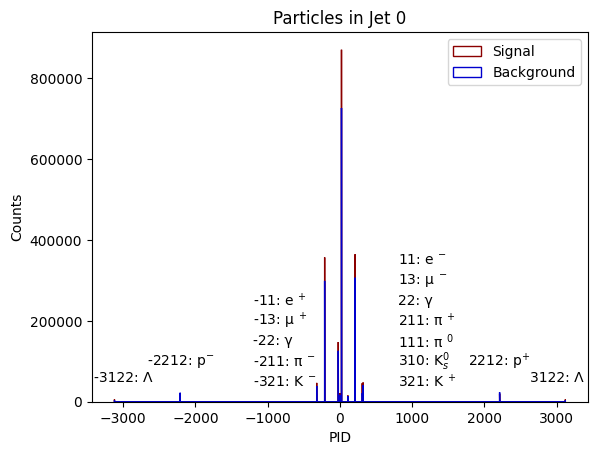

In [59]:
# Plot of Jet 0 Daughters PID (not including some outliers)
plt.hist(sig_list, label='Signal', bins='auto', range=None, histtype='step', color='darkred')
plt.hist(back_list, label='Background', bins='auto', range=None, histtype='step', color='mediumblue')

plt.text(-3000, 60000, '-3122: Λ', horizontalalignment='center', verticalalignment='center')
plt.text(-2200, 100000, '-2212: p$^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-1200, 50000, '-321: K $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1200, 100000, '-211: π $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1200, 150000, '-22: γ', horizontalalignment='left', verticalalignment='center')
plt.text(-1200, 200000, '-13: µ $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(-1200, 250000, '-11: e $^{+}$', horizontalalignment='left', verticalalignment='center')

plt.text(800, 350000, '11: e $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(800, 300000, '13: µ $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(800, 250000, '22: γ', horizontalalignment='left', verticalalignment='center')
plt.text(800, 200000, '211: π $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(800, 150000, '111: π $^{0}$', horizontalalignment='left', verticalalignment='center')
plt.text(800, 100000, '310: K$^{0}_{s}$', horizontalalignment='left', verticalalignment='center')
plt.text(800, 50000, '321: K $^{+}$', horizontalalignment='left', verticalalignment='center')
plt.text(2200, 100000, '2212: p$^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(3000, 60000, '3122: Λ', horizontalalignment='center', verticalalignment='center')

plt.xlabel('PID');
plt.ylabel('Counts');
plt.title('Particles in Jet 0');
plt.legend(loc='best');

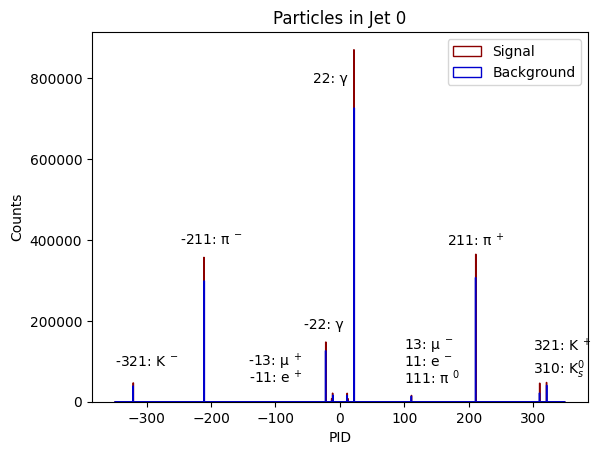

In [54]:
# Plot of Daughters PID in range of pions
plt.hist(sig_list, label='Signal', bins='auto', range=[-350,350], histtype='step', color='darkred')
plt.hist(back_list, label='Background', bins='auto', range=[-350,350], histtype='step', color='mediumblue')

plt.text(-300, 100000, '-321: K $^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-200, 400000, '-211: π $^{-}$', horizontalalignment='center', verticalalignment='center')
plt.text(-25, 190000, '-22: γ', horizontalalignment='center', verticalalignment='center')
plt.text(-100, 100000, '-13: µ $^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(-100, 60000, '-11: e $^{+}$', horizontalalignment='center', verticalalignment='center')

plt.text(100, 100000, '11: e $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(100, 140000, '13: µ $^{-}$', horizontalalignment='left', verticalalignment='center')
plt.text(-15, 800000, '22: γ', horizontalalignment='center', verticalalignment='center')
plt.text(100, 60000, '111: π $^{0}$', horizontalalignment='left', verticalalignment='center')
plt.text(211, 400000, '211: π $^{+}$', horizontalalignment='center', verticalalignment='center')
plt.text(300, 80000, '310: K$^{0}_{s}$', horizontalalignment='left', verticalalignment='center')
plt.text(300, 140000, '321: K $^{+}$', horizontalalignment='left', verticalalignment='center')

plt.xlabel('PID');
plt.ylabel('Counts');
plt.title('Particles in Jet 0');
plt.legend(loc='best');

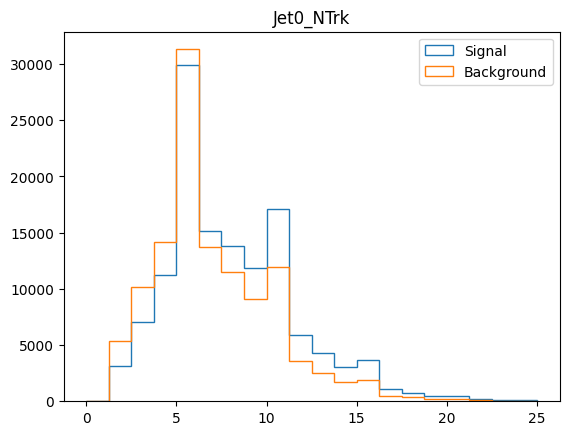

In [ ]:
# histogram using custom plot function with log scale
custom_plot(df.Jet0_NTrk, df2.Jet0_NTrk, 20, [0,25], "Jet0_NTrk", False)

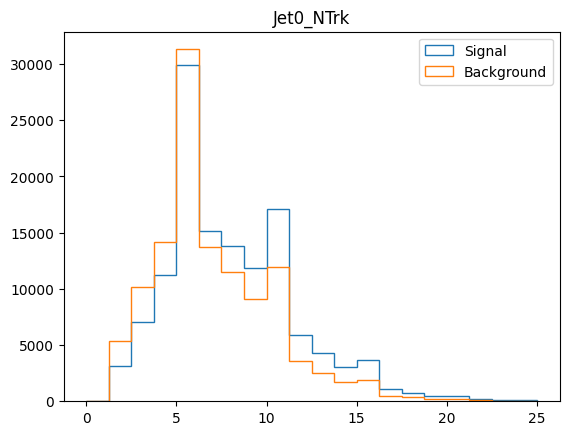

In [ ]:
# histogram of Jet0_NTrk
plt.hist(df.Jet0_NTrk, label="Signal", bins=20, range =[0,25], histtype='step')
plt.hist(df2.Jet0_NTrk, label="Background", bins=20, range=[0,25], histtype='step')
plt.legend(loc='best')
plt.title("Jet0_NTrk");

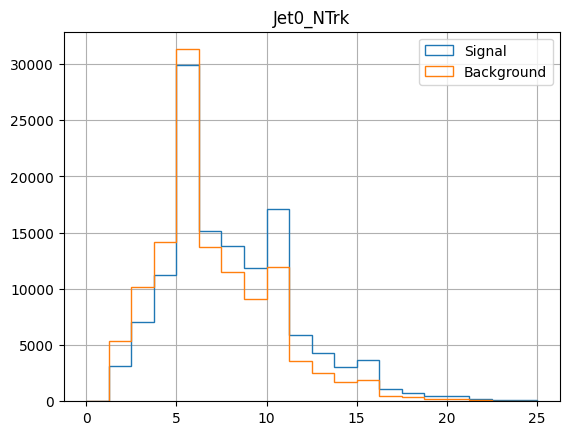

In [ ]:
# histogram of Jet0_NTrk to make sure the plots look the same
ax = df.hist(column='Jet0_NTrk', bins=20, range =[0,25], histtype='step')
df2.hist(ax=ax, column='Jet0_NTrk', bins=20, range=[0,25], histtype='step')
plt.legend(["Signal", "Background"]);

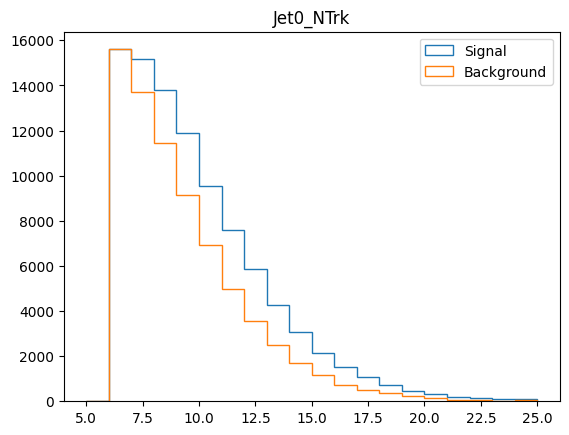

In [ ]:
# only plot Jet0_NTrk > 5
dfcut = df[df.Jet0_NTrk > 5]
df2cut = df2[df2.Jet0_NTrk > 5]

plt.hist(dfcut.Jet0_NTrk, label="Signal", bins=20, range=[5,25], histtype='step')
plt.hist(df2cut.Jet0_NTrk, label="Background", bins=20, range=[5,25], histtype='step')
plt.legend(loc='best')
plt.title("Jet0_NTrk");

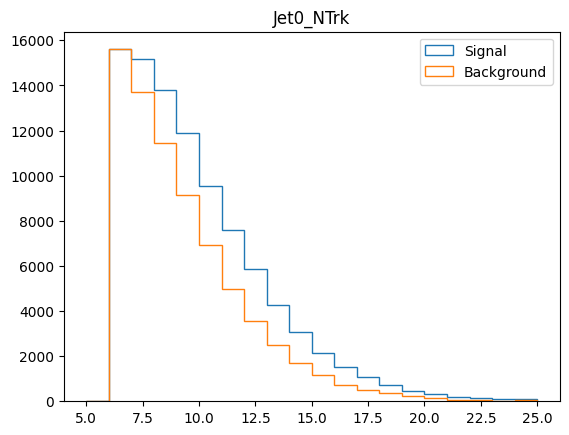

In [ ]:
custom_plot(dfcut.Jet0_NTrk, df2cut.Jet0_NTrk, 20, [5,25], "Jet0_NTrk", False)

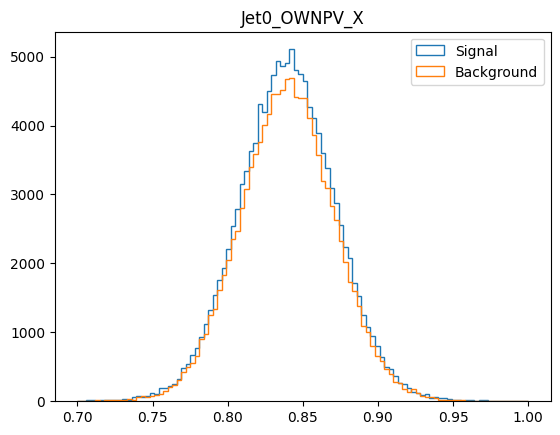

In [ ]:
# plot of OWNPV X
# range = [0.7,1] on linear scale
custom_plot(df.Jet0_OWNPV_X, df2.Jet0_OWNPV_X, 100, [0.7,1], "Jet0_OWNPV_X", False)

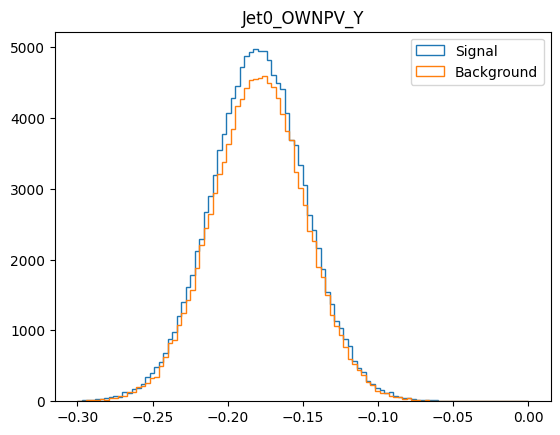

In [ ]:
# plot of Jet0_OWNPV_Y
# range = [-0.3,0] on linear scale
custom_plot(df.Jet0_OWNPV_Y, df2.Jet0_OWNPV_Y, 100, [-0.3,0], "Jet0_OWNPV_Y", False)

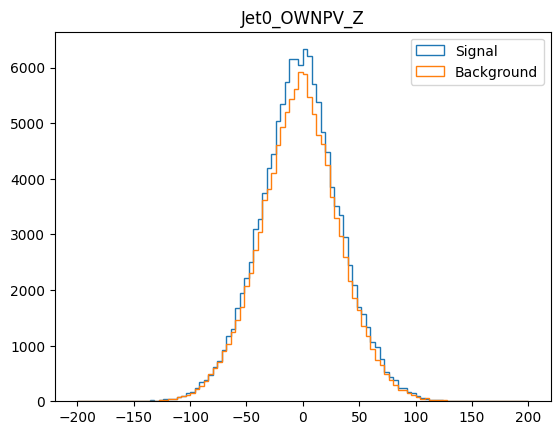

In [ ]:
# plot of Jet0_OWNPV_Z
# range = [-200,200] on linear scale
custom_plot(df.Jet0_OWNPV_Z, df2.Jet0_OWNPV_Z, 100, [-200,200], "Jet0_OWNPV_Z", False)

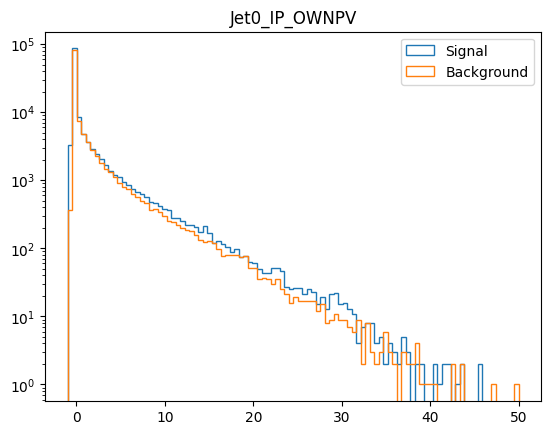

In [ ]:
# plot of Jet0_IP_OWNPV
# range = [-10,10] on linear scale
# range = [-1,50] on log scale
custom_plot(df.Jet0_IP_OWNPV, df2.Jet0_IP_OWNPV, 100, [-1,50], "Jet0_IP_OWNPV", True)

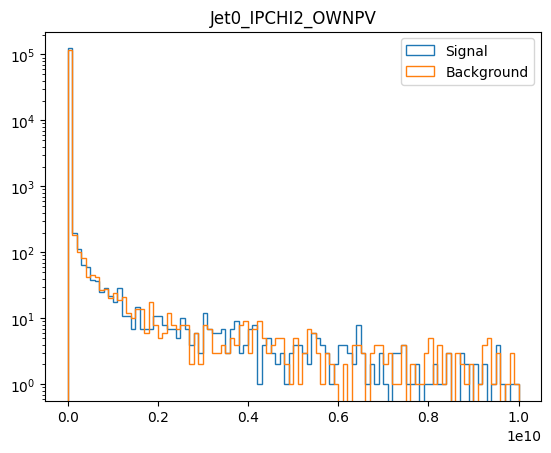

In [ ]:
# plot of Jet0_IPCHI2_OWNPV
# range = [-0.1,0.5] on linear scale
# range = [-0.01,0.5] on log scale
custom_plot(df.Jet0_IPCHI2_OWNPV, df2.Jet0_IPCHI2_OWNPV, 100, [-0.01,1e10], "Jet0_IPCHI2_OWNPV", True)

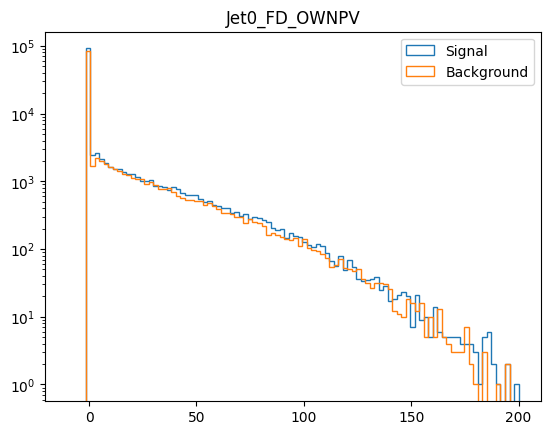

In [ ]:
# plot of Jet0_FD_OWNPV
# range = [-0.001,0.015] on linear scale
# range = [-0.001,0.015] on log scale
custom_plot(df.Jet0_FD_OWNPV, df2.Jet0_FD_OWNPV, 100, [-10,200], "Jet0_FD_OWNPV", True)

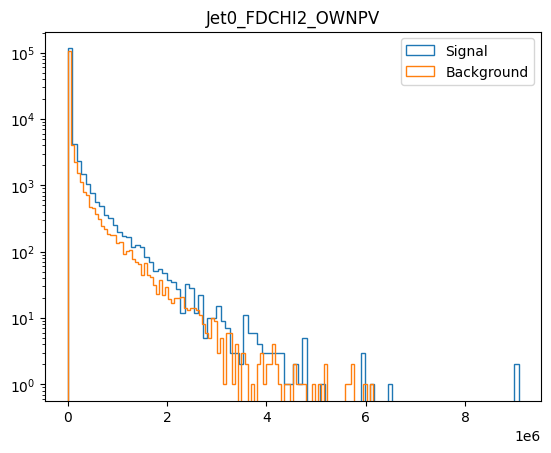

In [ ]:
# plot of Jet0_FDCHI2_OWNPV
# range = [0,0.01] on linear scale
custom_plot(df.Jet0_FDCHI2_OWNPV, df2.Jet0_FDCHI2_OWNPV, 100, None, "Jet0_FDCHI2_OWNPV", True)

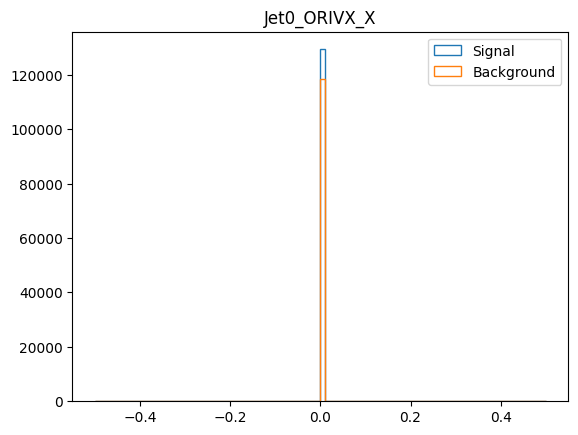

In [ ]:
# plot of Jet0_ORIVX_X
custom_plot(df.Jet0_ORIVX_X, df2.Jet0_ORIVX_X, 100, None, "Jet0_ORIVX_X", False)

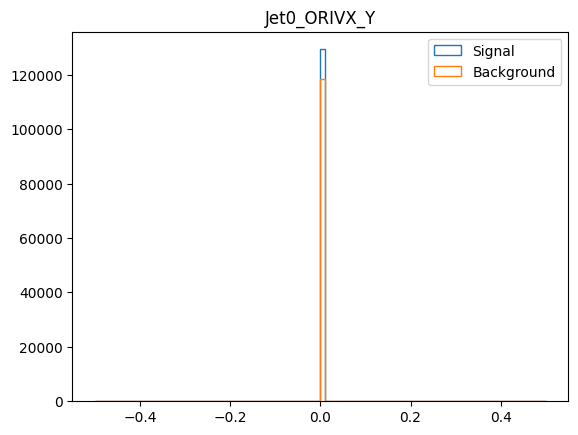

In [ ]:
# plot of Jet0_ORIVX_Y
custom_plot(df.Jet0_ORIVX_Y, df2.Jet0_ORIVX_Y, 100, None, "Jet0_ORIVX_Y", False)

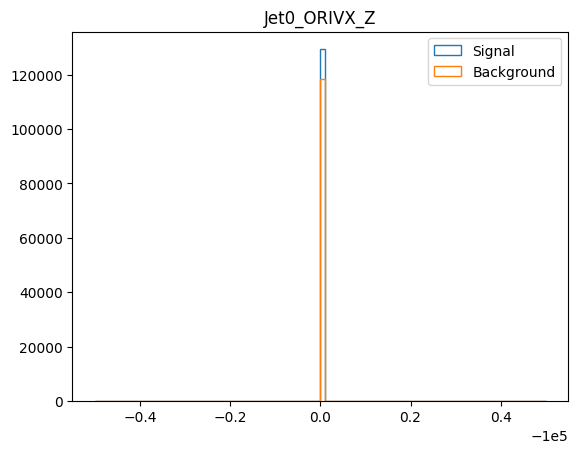

In [ ]:
# plot of Jet0_ORIVX_Z
custom_plot(df.Jet0_ORIVX_Z, df2.Jet0_ORIVX_Z, 100, None, "Jet0_ORIVX_Z", False)

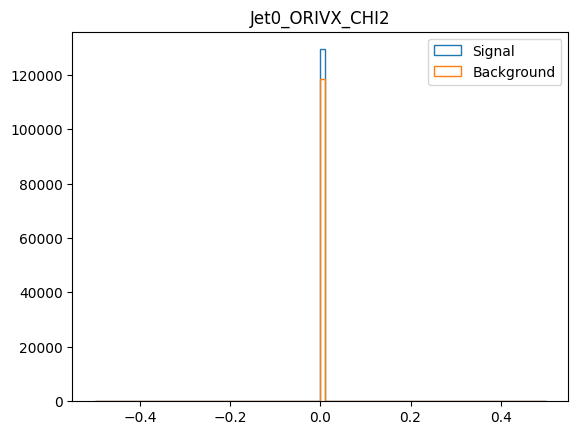

In [ ]:
# plot of Jet0_ORIVX_CHI2
custom_plot(df.Jet0_ORIVX_CHI2, df2.Jet0_ORIVX_CHI2, 100, None, "Jet0_ORIVX_CHI2", False)

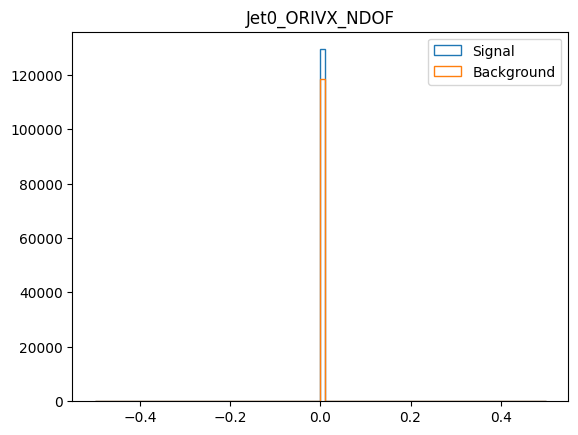

In [ ]:
# plot of Jet0_ORIVX_NDOF
custom_plot(df.Jet0_ORIVX_NDOF, df2.Jet0_ORIVX_NDOF, 100, None, "Jet0_ORIVX_NDOF", False)

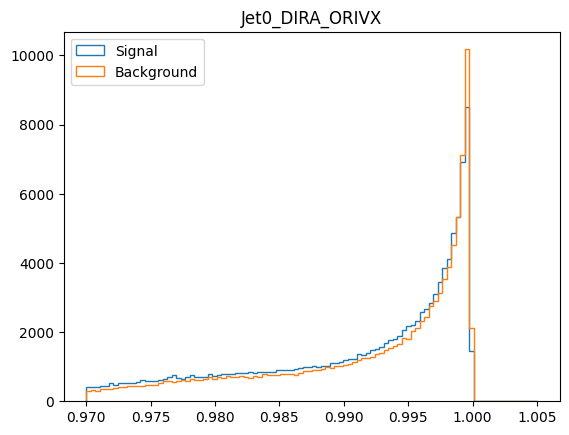

In [ ]:
# plot of Jet0_DIRA_ORIVX
# range = [0.97,1.005] on linear scale
custom_plot(df.Jet0_DIRA_ORIVX, df2.Jet0_DIRA_ORIVX, 100, [0.97,1.005], "Jet0_DIRA_ORIVX", False)

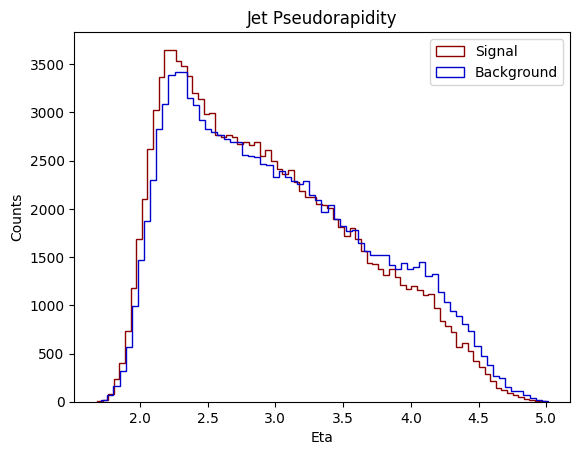

In [ ]:
plt.hist(df.Jet0_Eta, label="Signal", range=None, bins='auto', histtype='step', color='darkred')
plt.hist(df2.Jet0_Eta, label="Background", range=None, bins='auto', histtype='step', color='mediumblue')
plt.xlabel('Eta');
plt.ylabel('Counts');
plt.legend(loc='best')
plt.title('Jet Pseudorapidity'); 

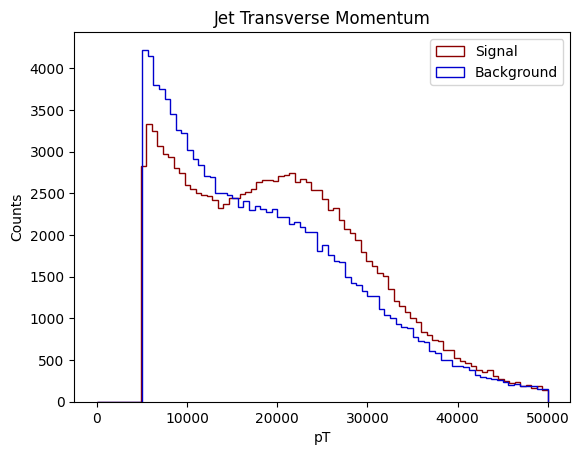

In [ ]:
plt.hist(df.Jet0_PT, label="Signal", range=[0,50000], bins='auto', histtype='step', color='darkred')
plt.hist(df2.Jet0_PT, label="Background", range=[0,50000], bins='auto', histtype='step', color='mediumblue')
plt.xlabel('pT');
plt.ylabel('Counts');
plt.legend(loc='best')
plt.title('Jet Transverse Momentum'); 

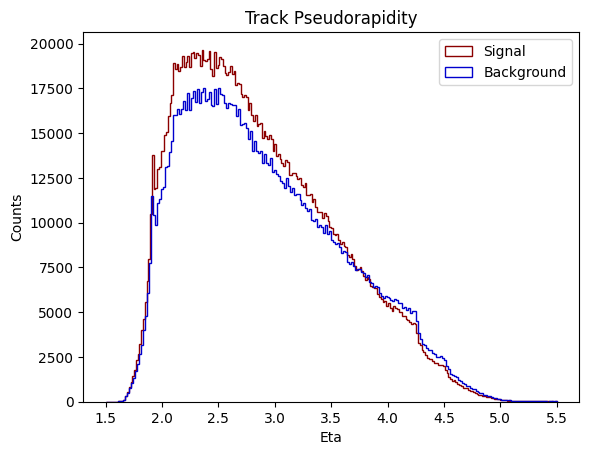

In [ ]:
plt.hist(d_eta_sig_list, label='Signal', bins='auto', range=[1.5,5.5], histtype='step', color='darkred')
plt.hist(d_eta_bkg_list, label='Background', bins='auto', range=[1.5,5.5], histtype='step', color='mediumblue')
plt.xlabel('Eta');
plt.ylabel('Counts');
plt.legend(loc='best');
plt.title('Track Pseudorapidity'); 

In [ ]:
d_eta_sig_list = []
d_eta_bkg_list = []

for i, row in df.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_Eta'].strip('[]').split(',')]
    d_eta_sig_list.extend(numbers)

for i, row in df2.iterrows():
    numbers = [float(num.strip()) for num in row['Jet0_Daughters_Eta'].strip('[]').split(',')]
    d_eta_bkg_list.extend(numbers)